In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
data=pd.read_csv("删除异常值1,0.csv")

In [3]:
data.head()

,Unnamed: 0,chuwin,chudraw,chulose,win,draw,lose,reslut,chuwinp,chudrawp,chulosep,winp,drawp,losep,"result1,0"
0,5,1.30,5.00,7.0,1.28,5.00,7.50,2,0.769231,0.200000,0.142857,0.781250,0.200000,0.133333,1
1,11,1.40,4.00,7.0,1.57,3.80,5.25,2,0.714286,0.250000,0.142857,0.636943,0.263158,0.190476,1
2,15,1.36,4.50,7.5,1.66,3.60,5.25,1,0.735294,0.222222,0.133333,0.602410,0.277778,0.190476,0
3,17,1.40,3.75,7.5,1.45,3.75,7.00,2,0.714286,0.266667,0.133333,0.689655,0.266667,0.142857,1
4,18,1.33,4.33,7.5,1.33,4.33,7.50,2,0.751880,0.230947,0.133333,0.751880,0.230947,0.133333,1


In [6]:
#展示频率
print(pd.crosstab(data["result1,0"],data["chuwin"],rownames=["result1,0"]))


chuwin     1.20  1.22  1.25  1.28  1.30  1.33  1.35  1.36  1.40  1.44  ...   \
result1,0                                                              ...    
0             0     0     0     7     9    40     0    29    65    74  ...    
1             5     5     8    29    35    78     3    81   144   118  ...    

chuwin     5.20  5.25  5.50  5.60  5.70  5.75  5.90  6.00  6.25  6.50  
result1,0                                                              
0             2   409  1125     1     1   316     1  1075    45   589  
1             1   109   238     0     0    64     0   175     4   143  

[2 rows x 79 columns]


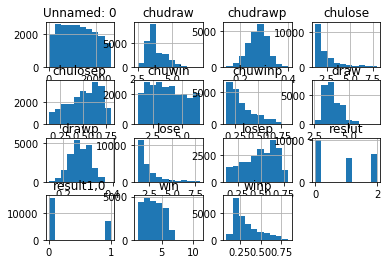

In [7]:
#画频率图
data.hist()
plt.show()

In [6]:
#加上常数项，显示指定。    
data["intercept"]=1.0
data.head()

,Unnamed: 0,chuwin,chudraw,chulose,win,draw,lose,reslut,chuwinp,chudrawp,chulosep,winp,drawp,losep,"result1,0",intercept
0,5,1.30,5.00,7.0,1.28,5.00,7.50,2,0.769231,0.200000,0.142857,0.781250,0.200000,0.133333,1,1.0
1,11,1.40,4.00,7.0,1.57,3.80,5.25,2,0.714286,0.250000,0.142857,0.636943,0.263158,0.190476,1,1.0
2,15,1.36,4.50,7.5,1.66,3.60,5.25,1,0.735294,0.222222,0.133333,0.602410,0.277778,0.190476,0,1.0
3,17,1.40,3.75,7.5,1.45,3.75,7.00,2,0.714286,0.266667,0.133333,0.689655,0.266667,0.142857,1,1.0
4,18,1.33,4.33,7.5,1.33,4.33,7.50,2,0.751880,0.230947,0.133333,0.751880,0.230947,0.133333,1,1.0


In [7]:
#指定作为训练变量的列
train_cols = data.columns[[8,9,10,11,12,13,15]]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit=sm.Logit(data['result1,0'], data[train_cols])

# 拟合模型
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.560783
         Iterations 5


In [8]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              result1,0   No. Observations:                22720
Model:                          Logit   Df Residuals:                    22713
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 Dec 2017   Pseudo R-squ.:                 0.08487
Time:                        22:53:37   Log-Likelihood:                -12741.
converged:                       True   LL-Null:                       -13923.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
chuwinp       -1.7106      1.159     -1.476      0.140      -3.981       0.560
chudrawp      -1.3714      1.492     -0.919      0.358      -4.296       1.553
chulosep      -1.3069      1.151     -1.136      0.2

In [10]:
# 构建预测集
# 与训练集相似，一般也是通过 pd.read_csv() 读入
# 在这边为方便，我们将训练集拷贝一份作为预测集（不包括 admin 列）
import copy
combos = copy.deepcopy(data)
 
# 数据中的列要跟预测时用到的列一致
predict_cols = combos.columns[[8,9,10,11,12,13,15]]

# 进行预测，并将预测评分存入 predict 列中
combos['predict'] = result.predict(combos[predict_cols])

In [12]:
#赔率可能性比实际小0.1就买t
t=0.1
combos.head(5)
money=1
for row in combos.iterrows():
    if (row["predict"]-row["winp"])>t:
        bet=(row["winp"]*row["win"]-1)/(row["win"]-1)
        if row["result1,0"]==1:
            money=money+bet*(row["winp"]-1)
        else:
            money=money-bet
print(money)

TypeError: tuple indices must be integers or slices, not str